<a href="https://colab.research.google.com/github/hindesh-akash/iPhone-14-Tweet-Sentiment-Analysis/blob/main/iPhone_14_Tweets_sentiment_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# iPhone-14 Tweets Sentiment Analysis

## About iPhone-14:
    iPhone-14 is the latest mobile phone launched by Apple on September 7, 2022.
    Packed with features and aggressive pricing, the iPhone-14 was trending all over the internet 
    with millions expressing their opinions.

### About Sentiment Analysis:
    Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether
    data is positive, negative or neutral.


About this project:

This Sentiment Analysis project aims to predict the opinions of over 140 thousand Twitter users on the recent launch of iPhone-14.


Data source: https://www.kaggle.com/datasets/tleonel/iphone14-tweets

### Data Downloading

In [225]:
!pip install -q kaggle

In [226]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [227]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [228]:
!kaggle datasets download -d tleonel/iphone14-tweets

iphone14-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [229]:
!unzip iphone14-tweets.zip 

Archive:  iphone14-tweets.zip
  inflating: iphone14-query-tweets.csv  


We will be using NLTK's VADER for sentiment analyis.

We could have used TextBlob also but VADER is more Social Media centric.

In [230]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [231]:
df = pd.read_csv('iphone14-query-tweets.csv')

### Data Preprocessing and Cleaning

Initial Dataset:

In [232]:
df


,date_time,username,user_location,user_description,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-08 22:49:29+00:00,TheAppleGang101,NaN,A new account dedicated to all of the latest l...,False,10,28,0,0,0,"<a href=""http://twitter.com/#!/download/ipad"" ...",iPhone SE 3 gets more expensive in the UK afte...
1,2022-09-08 22:49:27+00:00,TheJessicats,1999,Tweet like nobody’s reading • standup comedian...,False,1642,1444,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@Travon I hope it happens before my iPhone 14 ...
2,2022-09-08 22:49:16+00:00,itschefnotjeff,📌 mom's basement,👨🏽‍💻💳🎫✈️,False,77,87,0,0,0,"<a href=""http://twitter.com/download/android"" ...","Nah iphone 14 upgrade just not it, change my m..."
3,2022-09-08 22:49:09+00:00,HalfRonin,Between the darkness and light,Preferring to be the dumbest person in the roo...,False,549,717,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",To the shock of absolutely no one: \n\nApple: ...
4,2022-09-08 22:49:09+00:00,Deejayrayman,Texas,Father of 3. Follower of Christ. Lover of all ...,False,48,153,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@TMobile @TMobileHelp will you be able to orde...
...,...,...,...,...,...,...,...,...,...,...,...,...
144240,2022-07-11 16:07:29+00:00,mohame4517_,"الدوحة, دولة قطر",ابتسم فلا محبتهم تبني لك قصراً ولا كرههم يحفر ...,False,6,57,0,0,0,"<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",iPhone 14 ENTIRE Lineup Early Look - https://t...
144241,2022-07-11 16:06:06+00:00,EricFitteDuval,Paris,fr.linkedin.com/in/ericfittedu…,False,894,196,0,1,0,"<a href=""https://dlvrit.com/"" rel=""nofollow"">d...",iPhone 14 strength will battle weak consumer s...
144242,2022-07-11 16:05:35+00:00,l_wzbr,NaN,@WestConn economics with acquired taste for math,False,18,197,0,0,0,"<a href=""http://twitter.com/download/android"" ...","@robertrosenfeld My Pixel 4's battery, never t..."
144243,2022-07-11 16:03:22+00:00,pekolands,she/her,🌸☄️┆ (hololive+arknights+anime),False,433,89,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",i don’t understand people who buy every new ip...


    There are around 144000 rows and 12 columns.
    Means we have 144k tweets for our analysis.

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144245 entries, 0 to 144244
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   date_time            144245 non-null  object
 1   username             144245 non-null  object
 2   user_location        97925 non-null   object
 3   user_description     127678 non-null  object
 4   verified             144245 non-null  bool  
 5   followers_count      144245 non-null  int64 
 6   following_count      144245 non-null  int64 
 7   tweet_like_count     144245 non-null  int64 
 8   tweet_retweet_count  144245 non-null  int64 
 9   tweet_reply_count    144245 non-null  int64 
 10  source               144245 non-null  object
 11  tweet_text           144245 non-null  object
dtypes: bool(1), int64(5), object(6)
memory usage: 12.2+ MB


    Only the columns user_location and user_description contain some null values. Let's check that out!

In [234]:
df['user_location'].value_counts()[:20]

India               3020
United States       2989
Lagos, Nigeria      1594
Nigeria             1282
New York, NY        1042
New Delhi, India     914
USA                  755
Los Angeles, CA      725
London, England      687
New York, USA        684
Worldwide            662
Everywhere           658
Canada               573
United Kingdom       531
Москва, Россия       509
New York             501
London               473
California, USA      459
127.0.0.1            449
Accra, Ghana         440
Name: user_location, dtype: int64

    While scrolling through this information we can come 
    to a conclusion that many locations are just abstract
    and do not exist. And we can't preprocess the unknown 
    location, although location would have been a great source of info.
    Sadly, we will have to drop it!
    And the same goes for 'user_name','user_description' columns.

In [235]:
df.drop(['username','user_location','user_description'],axis=1,inplace=True)

In [236]:
df.head()

,date_time,verified,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,source,tweet_text
0,2022-09-08 22:49:29+00:00,False,10,28,0,0,0,"<a href=""http://twitter.com/#!/download/ipad"" ...",iPhone SE 3 gets more expensive in the UK afte...
1,2022-09-08 22:49:27+00:00,False,1642,1444,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@Travon I hope it happens before my iPhone 14 ...
2,2022-09-08 22:49:16+00:00,False,77,87,0,0,0,"<a href=""http://twitter.com/download/android"" ...","Nah iphone 14 upgrade just not it, change my m..."
3,2022-09-08 22:49:09+00:00,False,549,717,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",To the shock of absolutely no one: \n\nApple: ...
4,2022-09-08 22:49:09+00:00,False,48,153,0,0,0,"<a href=""http://twitter.com/download/iphone"" r...",@TMobile @TMobileHelp will you be able to orde...


    The next we will clean 'date_time' column

In [237]:
df['date'] = pd.to_datetime(df['date_time']).dt.date

In [238]:
df['time'] = pd.to_datetime(df['date_time']).dt.time

In [239]:
df.drop(['date_time'],axis=1,inplace=True)

    We will reindex the columns of our dataset for convinience

In [240]:
df = df.reindex(columns=['date', 'time','verified',  'source', 'tweet_text','followers_count', 'following_count', 'tweet_like_count',
       'tweet_retweet_count', 'tweet_reply_count'])

    Let's look at the 'source' column.

In [241]:
df['source']

0         <a href="http://twitter.com/#!/download/ipad" ...
1         <a href="http://twitter.com/download/iphone" r...
2         <a href="http://twitter.com/download/android" ...
3         <a href="http://twitter.com/download/iphone" r...
4         <a href="http://twitter.com/download/iphone" r...
                                ...                        
144240    <a href="https://ifttt.com" rel="nofollow">IFT...
144241    <a href="https://dlvrit.com/" rel="nofollow">d...
144242    <a href="http://twitter.com/download/android" ...
144243    <a href="http://twitter.com/download/iphone" r...
144244    <a href="https://mobile.twitter.com" rel="nofo...
Name: source, Length: 144245, dtype: object

In [242]:
#A particular value:
df['source'][0]

'<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>'

    The 'source' column describes about the device type used to make the tweet.
    Since it is in form of a link we need to extract the device type from it.

In [243]:
import re
def getDeviceName(link): #A utility function to separate device part with link
  
  strings = re.split('<\/',link)
  device = strings[0].split('">')[1]

  return device

In [244]:
df['source'] = df['source'].apply(lambda x: getDeviceName(x))

In [245]:
#Now the source column looks like:
df['source'].unique()[:50]

array(['Twitter for iPad', 'Twitter for iPhone', 'Twitter for Android',
       'WordPress.com', 'Linky for iOS', 'Twitter Web App', 'dlvr.it',
       'Revive Social App', 'Spring for Apple', '9to5Mac', 'IFTTT',
       'ContentStudio.io', 'wpTechnorapper', 'Microsoft Power Platform',
       'Hootsuite Inc.', 'Tumblr', 'Tweetbot for iΟS', 'Echofon',
       'Newsnoon', 'Buffer', 'Blog2Social APP', 'Khoros CX', 'Glittall',
       'techosmo', 'theguru.pro', 'TweetDeck', 'LinkedIn', 'cedarnews',
       'SocialFlow', 'NewsroomSix', 'FromMienia', 'SocialPilot.co',
       'Abo_Sadiq Tips_TechNews', 'Zapier.com', 'Aviary for Twitter',
       'Tweetbot for Mac', 'Fook.News', '365newsx', 'Channel969',
       'Twitter for Mac', 'FashionOnGO', 'Substack', 'SocialChamp IO ',
       'Best.Photography Connect', 'ichitaso bot', 'Cherumbu News',
       'Twitterrific for iOS', 'BestTLDApp', 'THEDOTBEST', 'BestTLD'],
      dtype=object)

    As you can see apart from iPhone, Android,Web App
    most users either used chatbots to tweet their views
    or used a different Social media to directly tweet to
    Twitter.
    For simplicity i have categorized all other third 
    party websites as 'chatbot' other than Twitter, Wordpress,Instagram,LinkedIN.


In [246]:
valid_list = ['Twitter for iPhone','Twitter for Android','WordPress.com','LinkedIn','Instagram','Twitter for Mac','Twitter Web App']

In [247]:
def separateChatbot(device,valid_list):
    if device not in valid_list:
        return 'Chatbot'
    else:
      return device

In [248]:
df['source'] = df['source'].apply(lambda x:separateChatbot(x,valid_list))

In [249]:
df.source.value_counts() #Now the source column looks fairly clean

Twitter for iPhone     49971
Chatbot                29259
Twitter for Android    23512
WordPress.com          21871
Twitter Web App        18507
Twitter for Mac          929
Instagram                124
LinkedIn                  72
Name: source, dtype: int64

For Sentiment Analysis it is an important practice to remove the special characters and punctuation marks and keep only words.

    Let's clean the 'tweet_text' column.

In [250]:
df['tweet_text'] = df['tweet_text'].apply(lambda x:re.sub(r'http\S+', '', x))
df['tweet_text'] = df['tweet_text'].apply(lambda x:re.sub('\W+',' ',x) )

In [251]:
df['tweet_text']

0         iPhone SE 3 gets more expensive in the UK afte...
1          Travon I hope it happens before my iPhone 14 ...
2         Nah iphone 14 upgrade just not it change my mind 
3         To the shock of absolutely no one Apple Ready ...
4          TMobile TMobileHelp will you be able to order...
                                ...                        
144240                  iPhone 14 ENTIRE Lineup Early Look 
144241    iPhone 14 strength will battle weak consumer s...
144242     robertrosenfeld My Pixel 4 s battery never th...
144243    i don t understand people who buy every new ip...
144244    iPhone 14 Series Could Cost 100 Higher Than iP...
Name: tweet_text, Length: 144245, dtype: object

In [252]:
#Storing a copy to avoid data loss in case of any error
df_copy = df

Now we are all set to analyze the sentiments. Let's go!

In [253]:
#We will analyze the sentiment using VADER
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [254]:
#We introduce a 'scores' column to store the value of scores generated by VADER
df['scores'] = df['tweet_text'].apply(lambda tweet_txt: sid.polarity_scores(tweet_txt))


In [255]:
#Our dataset:
df.loc[:,['date','tweet_text','scores']]

,date,tweet_text,scores
0,2022-09-08,iPhone SE 3 gets more expensive in the UK afte...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,2022-09-08,Travon I hope it happens before my iPhone 14 ...,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp..."
2,2022-09-08,Nah iphone 14 upgrade just not it change my mind,"{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp..."
3,2022-09-08,To the shock of absolutely no one Apple Ready ...,"{'neg': 0.111, 'neu': 0.674, 'pos': 0.216, 'co..."
4,2022-09-08,TMobile TMobileHelp will you be able to order...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
...,...,...,...
144240,2022-07-11,iPhone 14 ENTIRE Lineup Early Look,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
144241,2022-07-11,iPhone 14 strength will battle weak consumer s...,"{'neg': 0.279, 'neu': 0.558, 'pos': 0.162, 'co..."
144242,2022-07-11,robertrosenfeld My Pixel 4 s battery never th...,"{'neg': 0.038, 'neu': 0.805, 'pos': 0.157, 'co..."
144243,2022-07-11,i don t understand people who buy every new ip...,"{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'comp..."


    The compound score is used to classify the given text as positive, negative or neutral.  
     1. If compound > 0 the statement is POSITIVE
     2. If compound < 0 the statement is NEGATIVE
     3. If compound = 0 the statement is NEUTRAL





In [256]:
df['compound'] = df['scores'].apply(lambda score_dict: score_dict['compound'])
df['sentiment_type']=''
df.loc[df.compound>0,'sentiment_type']='POSITIVE'
df.loc[df.compound==0,'sentiment_type']='NEUTRAL'
df.loc[df.compound<0,'sentiment_type']='NEGATIVE'

In [257]:
df.loc[:,['date','tweet_text','compound','sentiment_type']]

,date,tweet_text,compound,sentiment_type
0,2022-09-08,iPhone SE 3 gets more expensive in the UK afte...,0.0000,NEUTRAL
1,2022-09-08,Travon I hope it happens before my iPhone 14 ...,0.4404,POSITIVE
2,2022-09-08,Nah iphone 14 upgrade just not it change my mind,-0.1027,NEGATIVE
3,2022-09-08,To the shock of absolutely no one Apple Ready ...,0.5913,POSITIVE
4,2022-09-08,TMobile TMobileHelp will you be able to order...,0.0000,NEUTRAL
...,...,...,...,...
144240,2022-07-11,iPhone 14 ENTIRE Lineup Early Look,0.0000,NEUTRAL
144241,2022-07-11,iPhone 14 strength will battle weak consumer s...,-0.3182,NEGATIVE
144242,2022-07-11,robertrosenfeld My Pixel 4 s battery never th...,0.7809,POSITIVE
144243,2022-07-11,i don t understand people who buy every new ip...,0.3612,POSITIVE


Now our dataset is ready to be asked questions from and give insights!

In [258]:
df.head()

,date,time,verified,source,tweet_text,followers_count,following_count,tweet_like_count,tweet_retweet_count,tweet_reply_count,scores,compound,sentiment_type
0,2022-09-08,22:49:29,False,Chatbot,iPhone SE 3 gets more expensive in the UK afte...,10,28,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1,2022-09-08,22:49:27,False,Twitter for iPhone,Travon I hope it happens before my iPhone 14 ...,1642,1444,0,0,0,"{'neg': 0.0, 'neu': 0.734, 'pos': 0.266, 'comp...",0.4404,POSITIVE
2,2022-09-08,22:49:16,False,Twitter for Android,Nah iphone 14 upgrade just not it change my mind,77,87,0,0,0,"{'neg': 0.135, 'neu': 0.865, 'pos': 0.0, 'comp...",-0.1027,NEGATIVE
3,2022-09-08,22:49:09,False,Twitter for iPhone,To the shock of absolutely no one Apple Ready ...,549,717,0,0,0,"{'neg': 0.111, 'neu': 0.674, 'pos': 0.216, 'co...",0.5913,POSITIVE
4,2022-09-08,22:49:09,False,Twitter for iPhone,TMobile TMobileHelp will you be able to order...,48,153,0,0,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


In [259]:
import matplotlib.pyplot as plt
import seaborn as sns


Q.1. What was the reaction of majority population on iPhone 14?

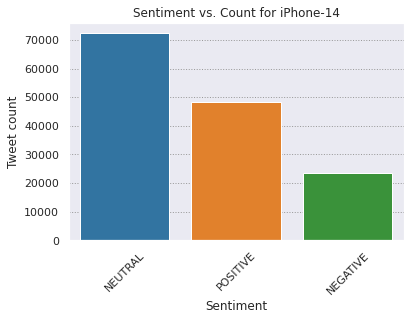

In [260]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(data=df, x="sentiment_type")
plt.xticks(rotation=45)
plt.title("Sentiment vs. Count for iPhone-14")
plt.ylabel('Tweet count')
plt.xlabel('Sentiment')
plt.show()

    Ans.1 -> Majority population had neutral views about iPhone-14. 
    Around 47000 people had positive reaction towards iPhone-14 and 23000 had a negative reaction.

Q.2. Compare the reactions of iPhone users to that of Android users on iPhone-14.

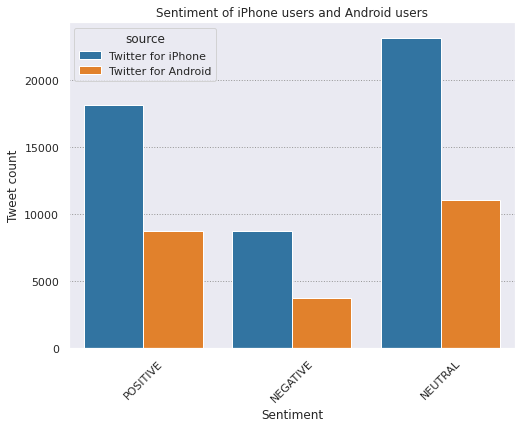

In [261]:
fig, ax = plt.subplots(figsize=(8, 6))
data_iPhone_Android = df[(df['source'] == "Twitter for iPhone") | (df['source'] =="Twitter for Android")]
sns.countplot(data=data_iPhone_Android, x="sentiment_type",hue="source" )
plt.xticks(rotation=45)
plt.title("Sentiment of iPhone users and Android users")
plt.ylabel('Tweet count')
plt.xlabel('Sentiment')
plt.show()

    Ans.2 -> It is clearly visible that iPhone users have tweeted more in every category of sentiment than Android users
    in the respective category.
    But the difference between the relative opinion of iPhone user is fairly large than Android users.
    It can be seen that most of the iPhone users either support iPhone-14 or have a neutral opinion about it.

Q.3. What is the distribution of different devices used for Tweets?

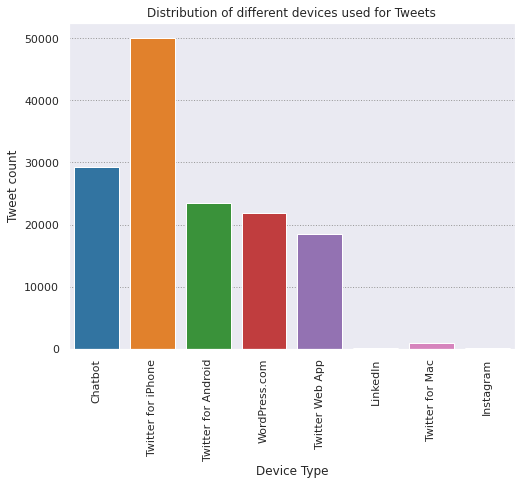

In [262]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(data=df,x="source")
plt.xticks(rotation=90)
plt.title("Distribution of different devices used for Tweets")
plt.ylabel('Tweet count')
plt.xlabel('Device Type')
plt.show()

    Ans.3-> Around 30000 people used third party apps or chatbots to present their views.
    It is interesting that most of the tweets were made by iPhone users.
    People do not use LinkedIn or Instagram as a source to tweet something.

Q.4. What is the distribution of reaction when a user is a verified user?

Note:- Verified user in Twitter means someone with a blue-tick. Generally celebrities and influencers have blue-ticks in their accounts.

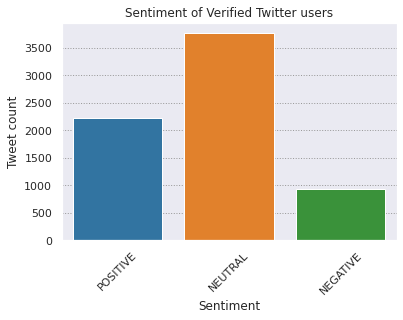

In [263]:
sns.countplot(data=df[df['verified']==True],x="sentiment_type")
plt.xticks(rotation=45)
plt.title("Sentiment of Verified Twitter users")
plt.ylabel('Tweet count')
plt.xlabel('Sentiment')
plt.show()

    Ans.4 -> In general we don't find any influencer without an Apple product but there were around 800 users
    who would still like to look for other options.

Q.5. What percentage of users with blue tick used Chatbot for tweet?


In [264]:
verified_chatbot_percent = (df[df['verified']==True]['source'].value_counts()['Chatbot'] / len(df.index))*100

In [265]:
print(f'Percentage of verified users who used chatbot for tweeting: {verified_chatbot_percent:.2f}%')

Percentage of verified users who used chatbot for tweeting: 2.85%


Let's plot some time-series data!

In [266]:
#We will create a new dataframe whose entries will be the frequency of a particular tweet on the respective day.

dates = np.sort(df['date'].unique()) #Storing the date values for reference
new_df = pd.DataFrame(dates,columns=['date'])

In [267]:
#In the next step we will add three columns and set the date column as index
new_df['negative'] = 0
new_df['neutral'] = 0
new_df['positive'] = 0

In [268]:
new_df.set_index('date',inplace=True)

In [269]:
new_df.head() #Now our new dataframe is ready to be populated.

,negative,neutral,positive
date,,,
2022-07-11,0,0,0
2022-07-12,0,0,0
2022-07-13,0,0,0
2022-07-14,0,0,0
2022-07-15,0,0,0


    We use the values in the 'dates' list to refer to the particular date in the original dataframe.
    And extract frequencies from that.

In [270]:
for d in dates:
  new_df.at[d,'positive'] = len(df.loc[df['date'] == d].loc[df['sentiment_type'] == 'POSITIVE'].index)
  new_df.at[d,'negative'] = len(df.loc[df['date'] == d].loc[df['sentiment_type'] == 'NEGATIVE'].index)
  new_df.at[d,'neutral'] = len(df.loc[df['date'] == d].loc[df['sentiment_type'] == 'NEUTRAL'].index)


In [271]:
new_df.head()

,negative,neutral,positive
date,,,
2022-07-11,42,81,51
2022-07-12,95,187,109
2022-07-13,108,176,81
2022-07-14,168,319,193
2022-07-15,132,239,188


Now our dataset is populated. Let's address a couple of more questions!

Q.6. Plot the trend line of frequency of tweets and discuss the following questions:

    i. What was the peak time for tweets about iPhone-14?
    ii. When was the no. of negative tweets greater than no. of positive tweet?
    iii. Which tweet trend prevailed through-out the 2 month time period?
  

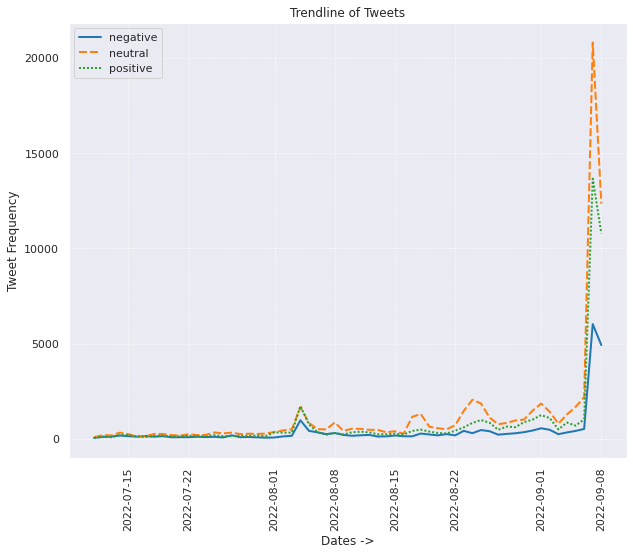

In [272]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
sns.set_context("notebook", rc={"lines.linewidth": 2})
sns.lineplot(data=new_df)
plt.grid(True,color='w')
plt.xticks(rotation=90)
plt.ylabel('Tweet Frequency')
plt.xlabel('Dates ->')
plt.title('Trendline of Tweets')
plt.show()

    Ans. 6.i. The peak time for tweets about iPhone-14 was around September 7,2022 because
    that was the official release date of iPhone-14.

    Ans. 6.ii. The negative tweets do not really overtook the positive and neutral tweets but
    around the end of July 2022 negative tweets were in equal amount to that of positive and neutral tweets.

    Ans. 6.iii. It is clearly visible that the neutral tweets prevailed. It might be possible that people
    liked the features but not the pricing of iPhone-14.

## Thank you!

Feel free to connect me on LinkedIn: https://www.linkedin.com/in/hindesh-akash/